In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Cargando los Datos (DOGS)

In [2]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array)
training_set_dict['label'] = np.load(training_image_labels_array)
training_set_dict['features'] = np.load(images_inception_features)

## Cargamos las features y las labels de cada feature
feats = training_set_dict['features']
#features shape = 10222x2048

lbls = training_set_dict['label']
#Labels shape = 10222x1

images_name = training_set_dict['images_name']

In [3]:
#10222 images
np.shape(feats)

(10222, 2048)

In [4]:
breeds = np.asarray(list(set(lbls)))
#120 dog breeds
len(breeds)

120

In [5]:
#### PCA a 2 dimensiones ######
from sklearn.decomposition import PCA as sklPCA
pca = sklPCA(n_components=2)
feats2D= pca.fit_transform(feats)

In [6]:
print(feats.shape)
print(feats2D.shape)

(10222, 2048)
(10222, 2)


Text(0, 0.5, '2nd Component')

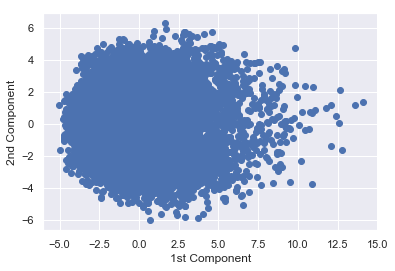

In [7]:
plt.scatter(feats2D[:, 0], feats2D[:, 1])
plt.xlabel('1st Component')
plt.ylabel('2nd Component')


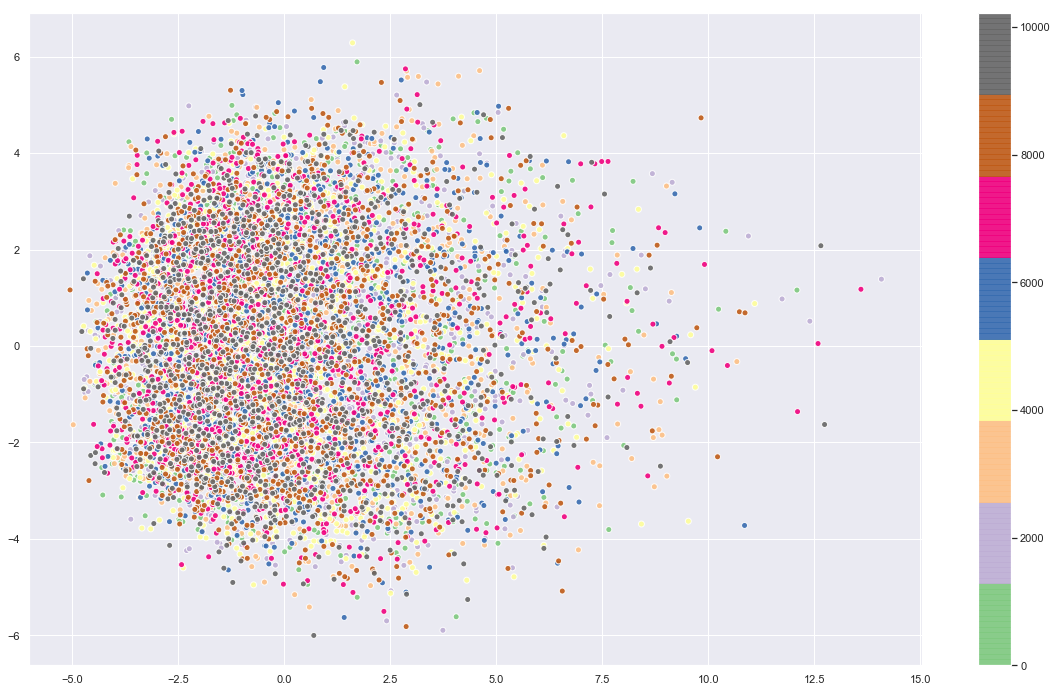

In [8]:
#Changing figure size (bigger)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12

#Plotting scatter plot including all
plt.scatter(feats2D[:, 0], feats2D[:, 1],
            c=range(0,10222), edgecolor='white', alpha=.9,
            cmap=plt.cm.get_cmap('Accent', len(breeds)))
plt.colorbar()

In [9]:
fig_size

[20, 12]

## K-means Clustering con Sklearn

#[Documentacion oficial](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [10]:
#We create a numpy array of data points because the Scikit-Learn library can work with
#numpy array type data inputs without requiring any preprocessing.
## Loading features and labels
feats = training_set_dict['features']
#shape = 10222x2048
lbls = training_set_dict['label']
#shape = 10222x1
images_name = training_set_dict['images_name']

In [90]:
clusters = 80
kmeans = KMeans(n_clusters=clusters, random_state  = 10)
kmeans.fit(feats)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=80, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [91]:
centers = kmeans.cluster_centers_
print(kmeans.cluster_centers_)

labels = kmeans.labels_
print(kmeans.labels_)

kmeans.cluster_centers_.shape

[[0.43516868 0.30536455 0.23626171 ... 0.26699096 0.30127212 0.35802788]
 [0.32239535 0.186987   0.39023948 ... 0.17989059 0.5277498  0.11686665]
 [0.31212413 0.17881137 0.17999464 ... 0.35035744 0.69195396 0.6150925 ]
 ...
 [0.2764617  0.30186176 0.27768886 ... 0.1707199  0.33240694 0.17075098]
 [0.32064855 0.24946223 0.19948457 ... 0.37981105 0.18910304 0.13132139]
 [0.22744112 0.25018507 0.20657161 ... 0.11269161 0.24323882 0.3287637 ]]
[ 6 18  0 ... 29 15 21]


(80, 2048)

In [92]:
labels[0:50]

array([ 6, 18,  0, 52, 22, 67, 67, 33, 73,  2, 42, 36, 39, 52, 25, 37, 56,
       31, 56, 46, 49, 17, 17, 67, 18, 22, 44, 60, 19, 43, 66, 74, 53, 20,
        0, 55, 70, 22,  6, 61, 56, 60,  3, 18, 66, 32,  9, 56, 11, 45])

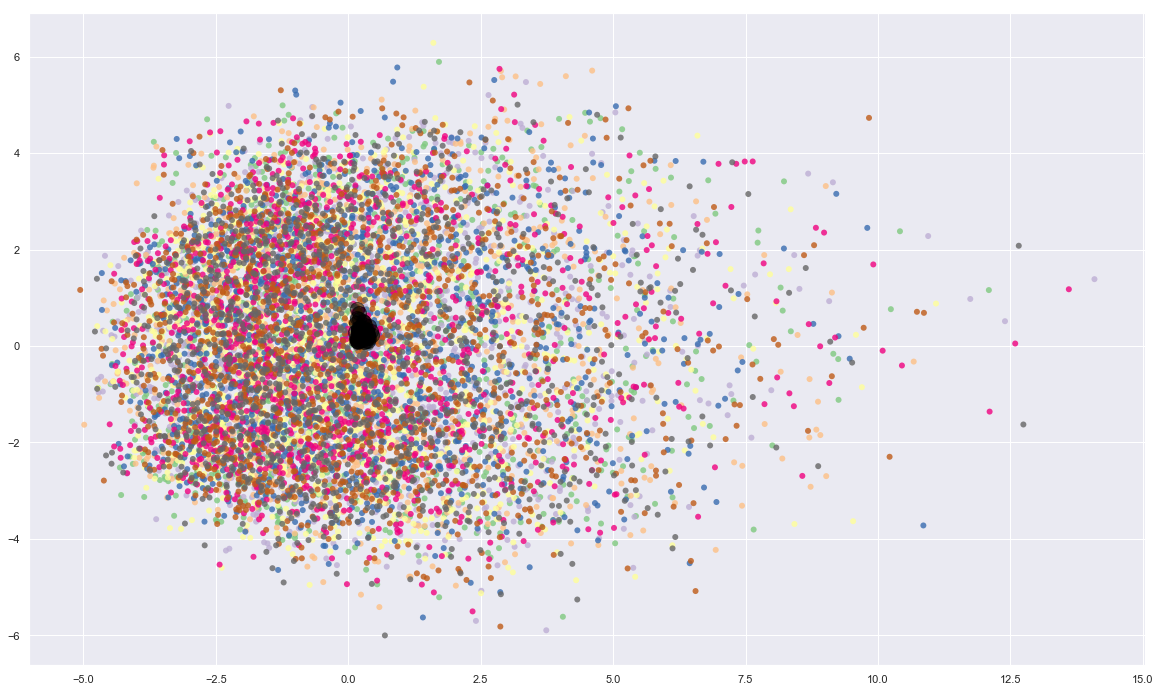

In [93]:
#Plots a scatter of the 2 new features after applying PCA.

plt.scatter(feats2D[:, 0],feats2D[:, 1],
            #Each feature has 10222 observations.
            c=range(0,10222), edgecolor='none', alpha=0.8,
            #Count of colors to use.... is equal to the clusters we used to divide the data (clusters)
            cmap=plt.cm.get_cmap('Accent', clusters))

#Plotting the centers of the clusters obtained in the model
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [100]:
#Filter all dogs clasified as 5
labels[labels==17]

array([17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17])

In [101]:
#Creating Bool array of elements that match breed = 5
criteria = labels==17

In [102]:
#We use Criteria variable to filter breeds from original images subset.
#Then with set, we remove duplicates and see what are the breeds clasified in the same K by the model
set(lbls[criteria])

{'afghan_hound',
 'airedale',
 'briard',
 'irish_setter',
 'irish_wolfhound',
 'old_english_sheepdog',
 'otterhound',
 'tibetan_terrier'}

El modelo clasifica por caracteristicas de los perros (de las 2048 que se reciben en el dataset de features), y no por las razas necesariamente. Podemos concluir esto, partiendo de las razas que se categorizaron en el modelo con el label = 17. 

Abajo estan las fotos de cada raza de las anteriores y puede evidenciarse las similitues en el pelo, forma y tamaño por ejemplo.

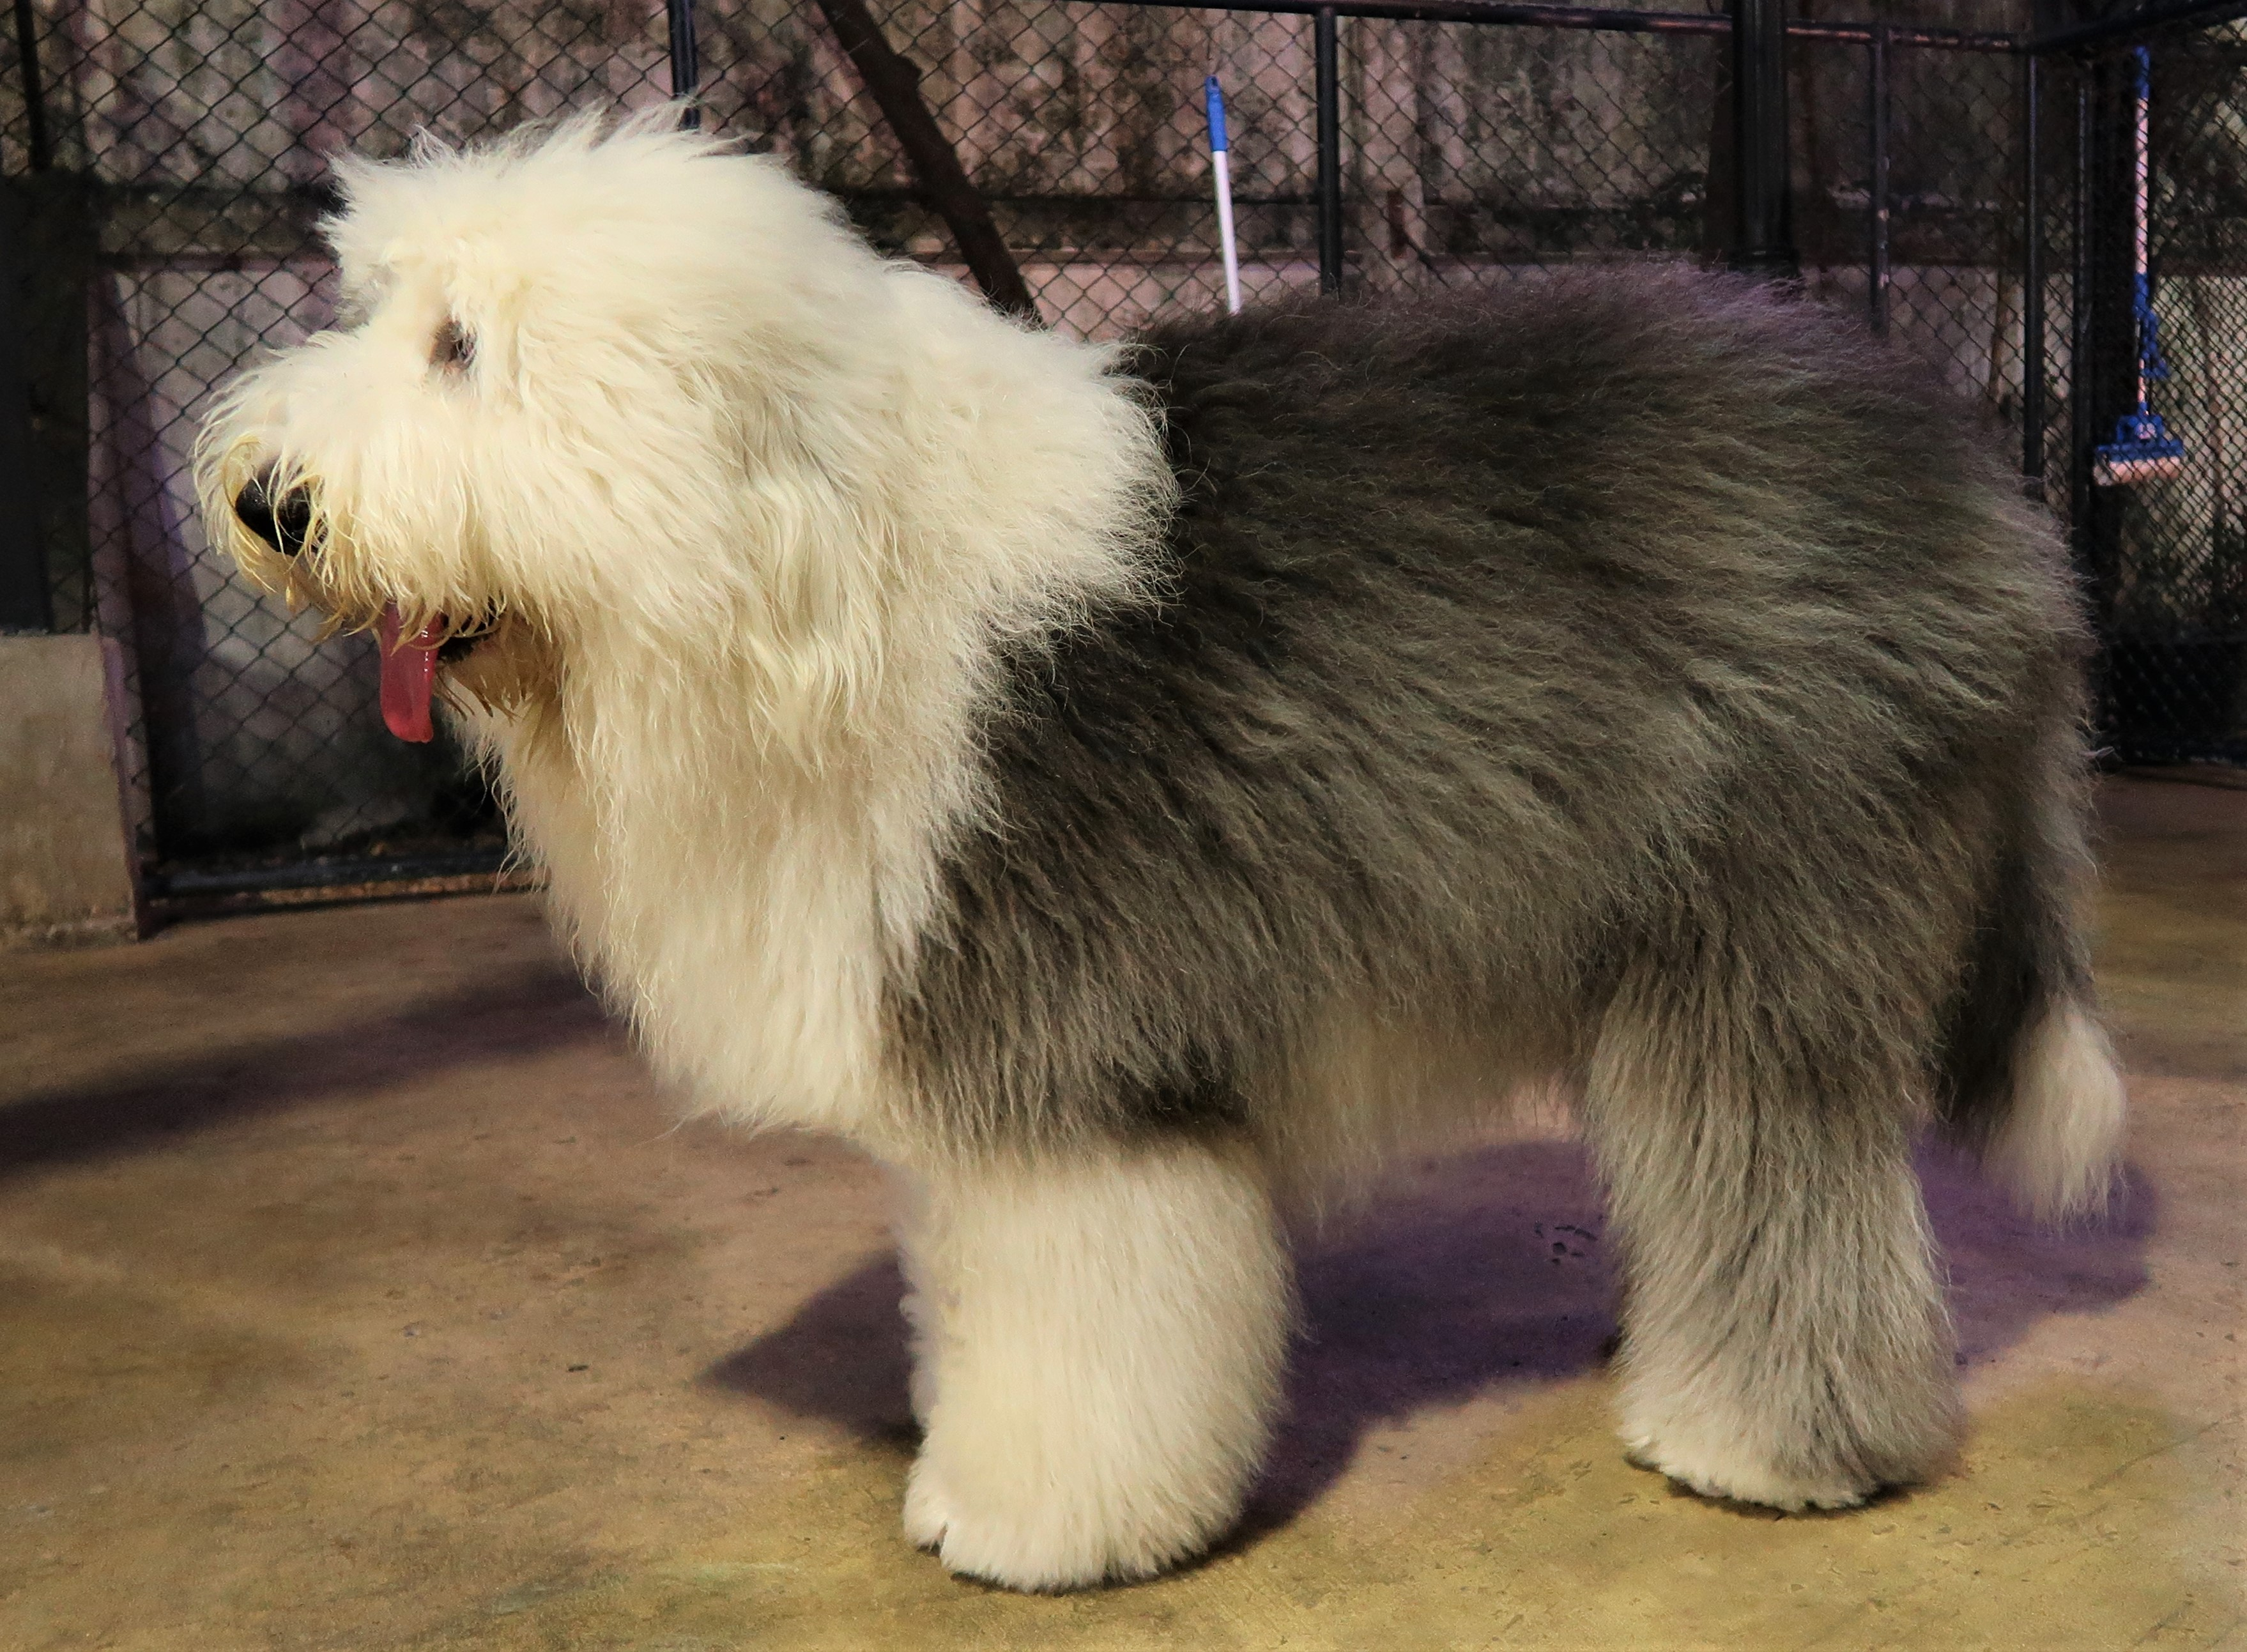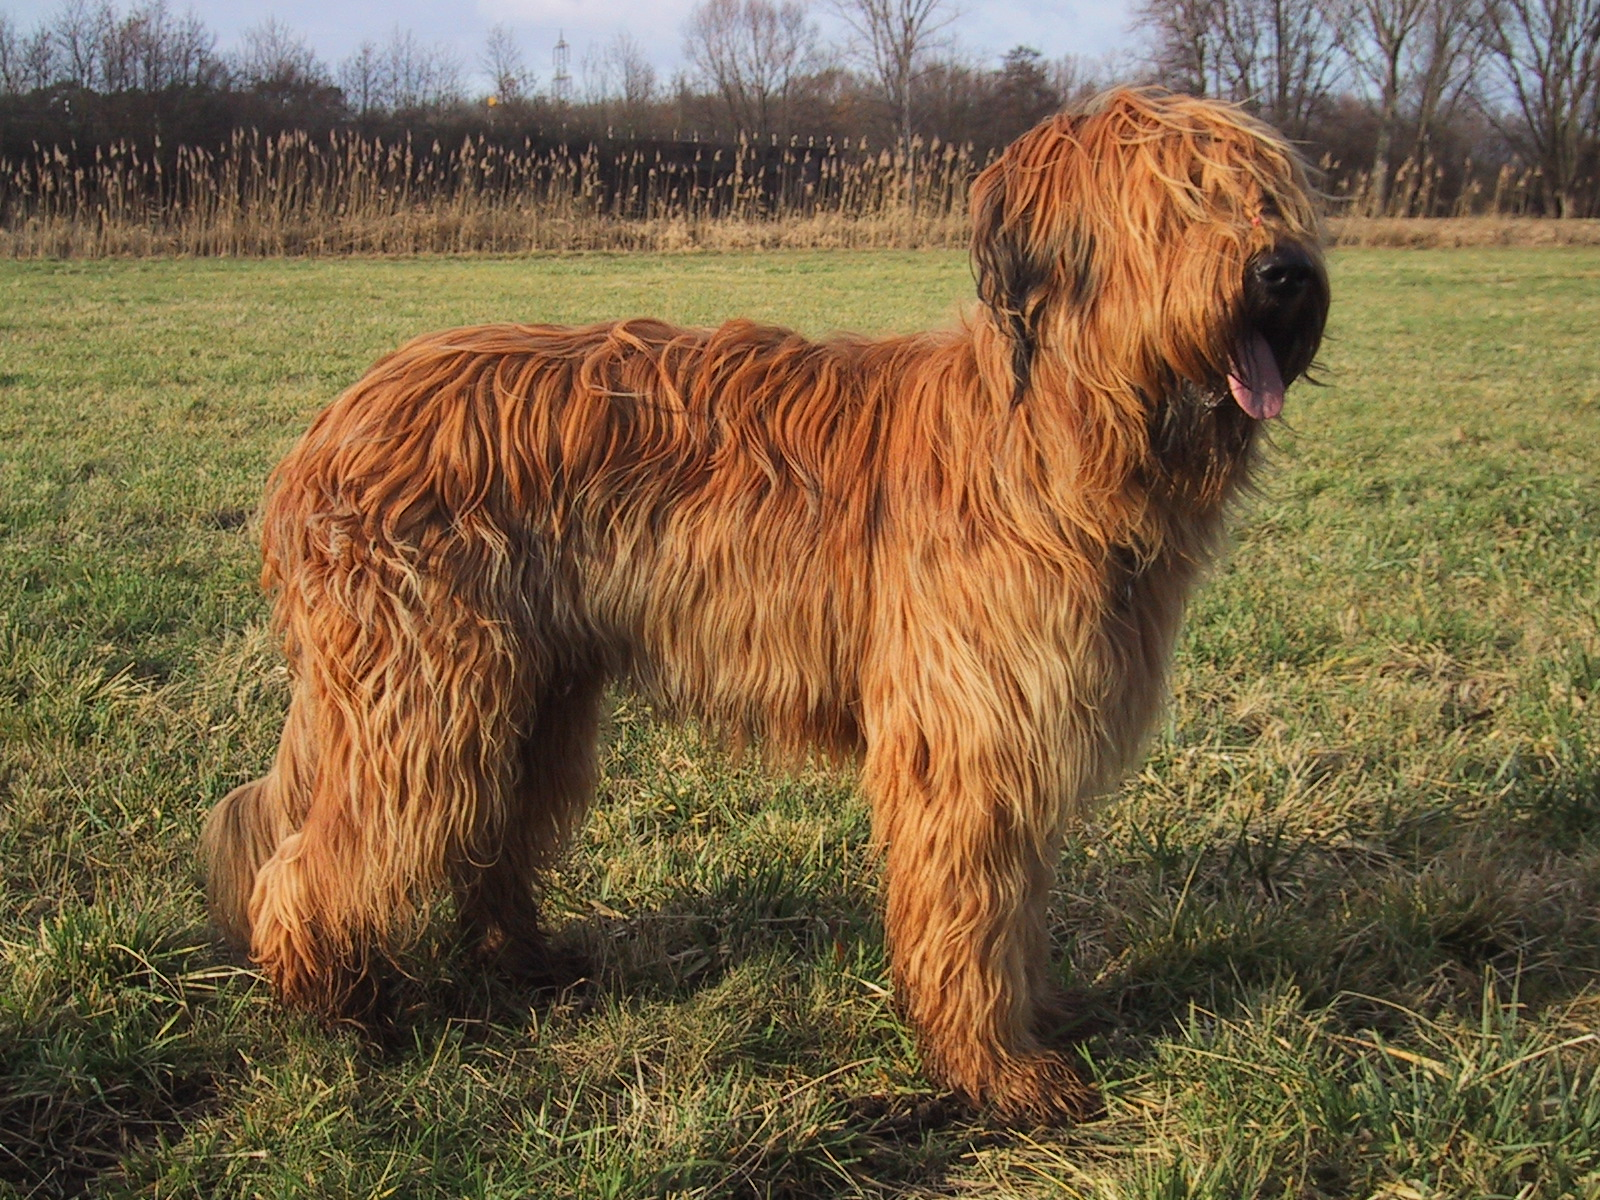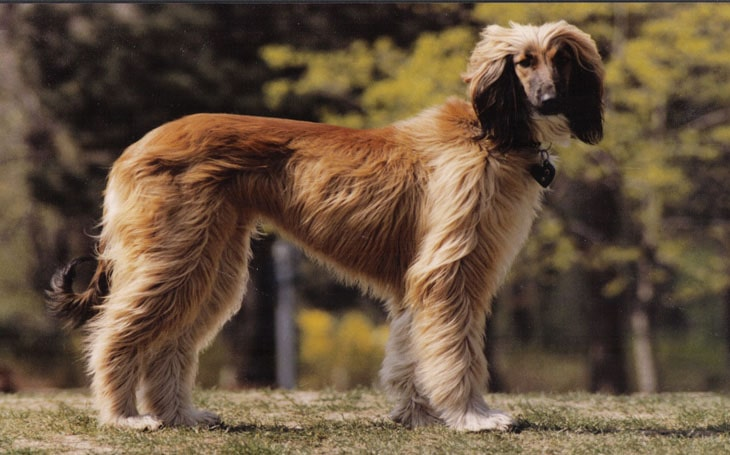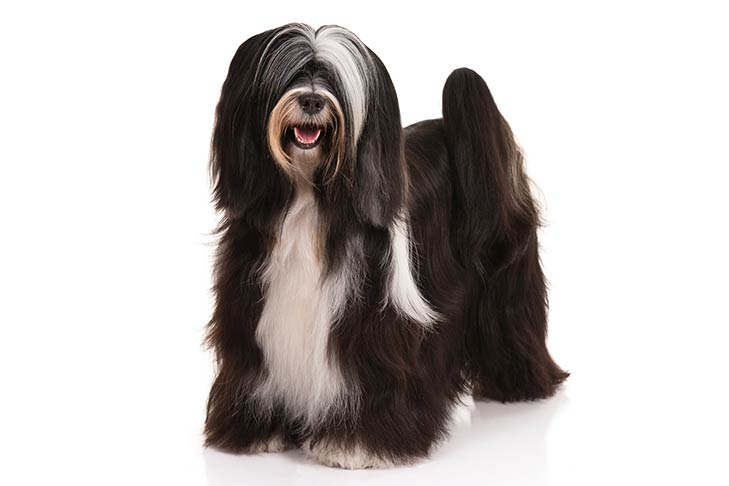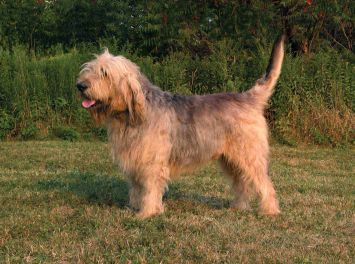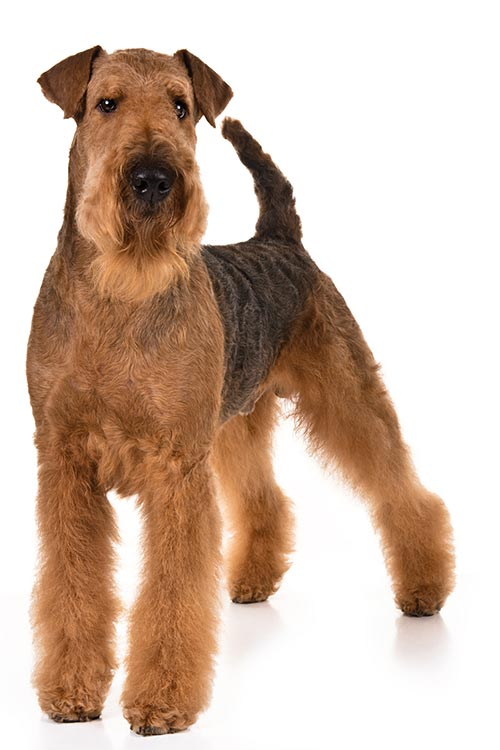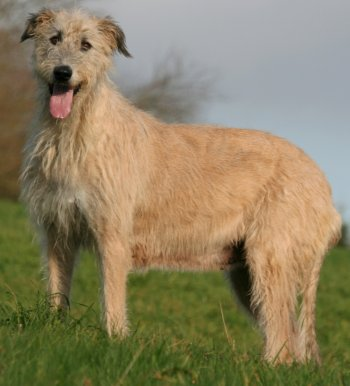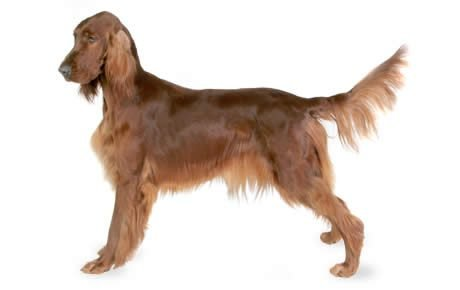